# Project-2: Sparse Representations

## Review of Relevant concepts

We want to be able to solve the following problem which we denote by $P_{0}$:

$\left(P_{0}\right): \mathbf{x}^{\star} = \text{argmin}_{\mathbf{x}} \Vert \mathbf{x} \Vert_{0}$ s.t. $\mathbf{b} = \mathbf{A}\mathbf{x}$

where we assume that $\mathbf{b} \in \mathbb{R}^{n}, \mathbf{A} \in \mathbb{R}^{n \times m} \text{ and } \mathbf{x} \in \mathbb{R}^{m}$ with $n << m$. So, $\mathbf{x}$ is considered to be a *tall* vector with many of the entries possibly zero. Our objective therefore is to find $\mathbf{x}$ which consists of two effective parts to be found:

- The **support** of $\mathbf{x}$ defined as $\mathcal{S}_x = \lbrace i: x_i \neq 0 \rbrace $,
- The elements of $\mathbf{x}$ over $\mathcal{S}_x$, which we can refer to as $\mathbf{x}_{\mathcal{S}_x}$. 

Also, recall that the $\ell_0$ norm is equal to the cardinality of such a support set $\mathcal{S}_x$.

### Relation between $\ell_{0}$ and $\text{spark}$

**Spark**: The spark of a matrix is the **smallest** number of **linearly dependent** columns

$\text{spark}\left(\mathbf{A}\right) = \text{min}_{\mathbf{x} \in \mathbb{R}^m} \Vert \mathbf{x} \Vert_{0}$ s.t. $\mathbf{A}\mathbf{x} = \boldsymbol{0}, \mathbf{x} \neq \boldsymbol{0}$

- The non-zero vectors in the null space of $\mathbf{A}$ satisfy: $\Vert \mathbf{x} \Vert_{0} \geq \text{spark}\left(\mathbf{A}\right)$

- For $\mathbf{A}\mathbf{x} = \mathbf{b}$, the **sparsest** solution necessarily satisfies the relation $\Vert \mathbf{x} \Vert_{0} < \frac{1}{2}\text{spark}\left(\mathbf{A}\right)$

- $2 \leq \text{spark}\left(\mathbf{A}\right) \leq n + 1$

But finding spark of a matrix is combinatorial problem. So, we choose to solve the $\ell_{0}$ problem via Greedy algorithms or smoothing penalty algorithms

## Orthogonal Matching Pursuit (OMP)

OMP is a greedy solution to the support-finding problem. We are assumed to be given as inputs: $\mathbf{A}$, $\mathbf{b}$ and $k_0$ (sparsity level of $\mathbf{x}$). This consists of the following parts:

1. Initialization
    - Set $k=0$ (iteration counter)
    - Set initial support set $\mathcal{S}_x^{(0)} = \phi$
    - Set initial residual to be $\mathbf{r}^{(0)} = \mathbf{b}$
    - Set error threshold $\varepsilon$

2. Repeat until either $\Vert\mathbf{r}^{(k)} \Vert_2 < \varepsilon$ or max no. of iterations is completed or $\Vert\mathbf{r}^{(k)} \Vert_2 > \Vert\mathbf{r}^{(k-1)} \Vert_2$

    - Sweep stage: Compute errors $\epsilon(j) = \min_{z_j} \Vert \mathbf{a}_jz_j - \mathbf{r}^{(k-1)}\Vert_2^2$ (find the optimal choice) and then finding $i_{k}^{\star} = \text{argmin}_{j} \epsilon(j)$. This can be also done in one single step.
    
    - Update support $\mathcal{S}_x^{(k)} = \mathcal{S}_x^{(k-1)} \cup i_k^{\star}$
    - Update residual $\mathbf{r}^{(k)} = \mathbf{b} - \mathbf{A}_{\mathcal{S}_x^{(k)}}\mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$
    - Update counter $k = k + 1$

3. Finally get $\hat{x} \in \mathbb{R}^N$ with $\hat{\mathbf{x}}_{\mathcal{S}_x^{(k)}} = \mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$ and remaining part as zeros.

## Subspace Pursuit (SP)

SP is another greedy solution. We are assumed to be given as inputs: $\mathbf{A}$, $\mathbf{b}$ and $k_0$ (sparsity level of $\mathbf{x}$). This consists of the following parts:

1. Initialization
    - Set $k=0$ (iteration counter)
    - Set initial support set $\mathcal{S}_x^{(0)} = \phi$
    - Set initial residual to be $\mathbf{r}^{(0)} = \mathbf{b} - \mathbf{A}_{\mathcal{S}_x^{(0)}}\mathbf{A}_{\mathcal{S}_x^{(0)}}^{\dagger}\mathbf{b}$
    - Set error threshold $\varepsilon$

2. Repeat until either $\Vert\mathbf{r}^{(k)} \Vert_2 < \varepsilon$ or max no. of iterations is completed or $\Vert\mathbf{r}^{(k)} \Vert_2 > \Vert\mathbf{r}^{(k-1)} \Vert_2$:

    - Find $k_0$ highest amplitudes of $\mathbf{A}^{\top}\mathbf{r}_{k-1}$ and set it as $\mathcal{S}_p$ 
    - Update support $\mathcal{S}_u = \mathcal{S}_x^{(k-1)} \cup \mathcal{S}_p$
    - Compute an orthgonal projection $\hat{\mathbf{x}}_{\mathcal{S}_u} = \mathbf{A}_{\mathcal{S}_u}^{\dagger}\mathbf{b}$ and assign remaining parts of the vector as 0.
    - Find $k_0$ highest amplitudes of $\hat{\mathbf{x}}$ and set it as $\mathcal{S}_x^{(k)}$
    - Update residual $\mathbf{r}^{(k)} = \mathbf{b} - \mathbf{A}_{\mathcal{S}_x^{(k)}}\mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$
    - Update counter $k = k + 1$

3. Finally get $\hat{x} \in \mathbb{R}^N$ with $\hat{\mathbf{x}}_{\mathcal{S}_x^{(k)}} = \mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$ and remaining part as zeros.

## Basis pursuit (BP)

Basis pursuit is a smoothing penalty approach to solving the $\ell_{0}$ problem. It involves using $\ell_1$ norm minimization. We wish to solve the following problem:

$\left(P_{1}\right): \mathbf{x}^{\star} = \text{argmin}_{\mathbf{x}} \Vert \mathbf{x} \Vert_{1}$ s.t. $\mathbf{b} = \mathbf{A}\mathbf{x}$

In the lecture, you have seen that this is a convex problem and can be implemented using linear programming (some pseduocode also given in the lecture slides). 

# Tasks

In this project, your task is to recover the sparse vector $\mathbf{x} \in \mathbb{R}^{m}$ with sparsity level $k \triangleq \Vert \mathbf{x} \Vert_0 << m$. Typically this sparsity level is somewhere between $5-10\%$. For the observation model, generate a random matrix instance $\mathbf{A} \in \mathbb{R}^{n \times m}$ and create an observation vector $\mathbf{b} = \mathbf{A}\mathbf{x}$. Then, try to reconstruct $\mathbf{x}$ from the observations $\mathbf{b}$ using:

1. Implement orthogonal matching pursuit (OMP) algorithm for reconstruction of $\mathbf{x}$ from the observations $\mathbf{b}$. 
2. Implement basis pursuit (BP) algorithm for reconstruction of $\mathbf{x}$ from the observations $\mathbf{b}$. 
3. For each case, try to show the phase transition in your results. **Phase transition** refers to a sudden change in the reconstruction quality from bad reconstruction quality to very good reconstruction quality, when the number of obervations $n$ is increased. You can try to plot a quality measure such as normalized mean squared error in dB scale vs. the ratio $\frac{n}{m}$, where $n$ represents the dimension of the observation vector and $m$ represents the dimension of the input vector $\mathbf{x}$. 
4. Compare the algorithms in terms of phase transitions. 
5. *Optional task: Also implement another greedy algorithm (psuedocode available in lecture slides) known as subspace pursuit (SP). Analyse the phase transition.*

Some code segments and function signatures are provided. You should fill in the functions. Perform all (or as many as you can) of the tasks in this project assignment. You are going to present your work to the course responsible or one of the teaching assistants (TA) and it pays off to have a clear, well structured and brief notebook. Include an algorithmic solution and/or numerical result and/or graphs wherever asked to illustrate your results. Your code should be functioning and easy to read.

## Libraries

You should use Python for implementation. The algorithms OMP, BP should be implemented without using dedicated library functions from `scikit-learn`. You can use: `numpy`, `scipy`, `matplotlib`, `cvxopt`/`cvxpy`. 

## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the data for testing the OMP algorithm

We seek to generate $\mathbf{x} \in \mathbb{R}^m$ having sparsity level $k_0 \triangleq \Vert \mathbf{x} \Vert_0 << m$. 

In [2]:
# Generate a vector x having sparsity levekl k_0 
def create_sparse_x(m, k0):        
    x = np.zeros((m, 1))
    x[np.random.choice(m,k0,replace=False), :] = np.random.randn(k0,1)
    return x

# Generate the observation matrix as a random matrix instance
def initialise_random_matrix(M, N):
    return np.random.uniform(low = -1, high = 1, size = (M,N))

# Generate the observation vector b
def create_observation_vector(A, x):
    return np.dot(A, x)

In [3]:
# Compute the Normalized mean squared error (NMSE) between the original x and reconstruction x_hat using OMP
def compute_NMSE(x, x_hat):

    nmse = np.mean(np.square(np.linalg.norm(x_hat - x, ord=2, axis=0))) / np.mean(np.square(np.linalg.norm(x, ord=2)))
    nmse_log10 = 10*np.log10(nmse)
    return nmse_log10

In [4]:
# Construct the reconstruction
def construct_x_hat(x_hat_Sx, S_x_hat, A):
    x_hat = np.zeros((A.shape[1], 1))
    x_hat[np.array(S_x_hat), :] = x_hat_Sx
    return x_hat

## Implementing the Orthogonal Matching Pursuit algorithm

In [5]:
def run_OMP(A, b, k0, tol=1e-4, maxiter=100):
    
    # Initialization step of OMP
    x_hat = np.zeros((A.shape[1], 1)) # Initialize the solution x
    r_k = np.zeros((b.shape[0], 1)) # Initialize the residual vector
    S_x_hat = [] # Initialize the support set
    
    for k in range(maxiter):
        
        # Sweep stage
        r_k_prev = np.copy(r_k)
        i_k = np.argmax(np.abs(np.dot(A.T,r_k_prev)))
        # Add i_k to the Support set
        S_x_hat.append(i_k)
        # Compute the residual
        A_S_x = A[:,np.array(S_x_hat)]
        r_k = b - np.dot(A[:,np.array(S_x_hat)] ,np.dot(np.linalg.pinv(A[:,np.array(S_x_hat)]),b))
        
        if np.linalg.norm(r_k) < tol and np.linalg.norm(r_k) < np.linalg.norm(r_k_prev):
            print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
            print("Algorithm converged!")
            break
        else:
            print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
    
    # Compute the final solution
    x_hat = np.dot(np.linalg.pinv(A[:,np.array(S_x_hat)]), b)
    
    return x_hat, S_x_hat

## Implementing the Subspace Pursuit Algorithm

In [6]:
def run_SP(A, b, k0, tol=1e-4, maxiter=3000):
    
    # Initialization step of OMP
    x_hat = np.zeros((A.shape[1], 1)) # Initialize the solution x
    S_x_k = np.argsort(np.abs(np.dot(A.T,b)), axis=0)[::-1][:k0].reshape(-1,).tolist()
    r_k = b - np.dot(A[:,np.array(S_x_k)] ,np.dot(np.linalg.pinv(A[:,np.array(S_x_k)]),b)) 
    
    for k in range(maxiter):
        
        # Sweep stage
        r_k_prev = np.copy(r_k)
        S_x_p = np.argsort(np.abs(np.dot(A.T,r_k_prev)), axis=0)[::-1][:k0].reshape(-1,).tolist()
        S_x_u = S_x_p + S_x_k  # Add S_x_hat to the Support set
        x_hat_ = np.dot(np.linalg.pinv(A[:,np.array(S_x_u)]), b) # Compute the residual
        x_hat_u = construct_x_hat(x_hat_, S_x_u, A) # Compute reconstruction error
        S_x_k = np.argsort(np.abs(x_hat_u), axis=0)[::-1][:k0].reshape(-1,).tolist() 
        r_k = b - np.dot(A[:,np.array(S_x_k)] ,np.dot(np.linalg.pinv(A[:,np.array(S_x_k)]),b))
        
        if np.linalg.norm(r_k) < tol and np.linalg.norm(r_k) < np.linalg.norm(r_k_prev):
            print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
            print("Algorithm converged!")
            break
        else:
            #print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
            continue
            
    # Compute the final solution
    x_hat = np.dot(np.linalg.pinv(A[:,np.array(S_x_k)]), b)
    
    return x_hat, S_x_k

## Plotting the NMSE vs $\frac{n}{m}$ for OMP and SP

We expect to see a **phase transition**, i.e. a sudden jump in the reconstruction quality from very bad reconstruction to a very good reconstruction quality when the number of observations $n$ is increased keeping $m$ fixed.

In [10]:
m = 50 # This is the length of the vector m
k0 = int(0.10 * m) # Usually the sparsity level is 5-10 % the value of m
x = create_sparse_x(m, k0)

In [11]:
n_arr = []
nmse_arr_OMP = []
nmse_arr_SP = []

for ni in range(1,m): # ni represents the dimension of the observation vector
    
    A = initialise_random_matrix(ni, m)
    b = create_observation_vector(A, x)
    
    print("Running OMP")
    x_hat_Sx, S_x_hat = run_OMP(A, b, k0, tol=1e-10, maxiter=100)
    x_hat_OMP = construct_x_hat(x_hat_Sx, S_x_hat, A)
    nmse_OMP = compute_NMSE(x=x, x_hat=x_hat_OMP)
    nmse_arr_OMP.append(nmse_OMP)
    
    print("Running SP")
    x_hat_Sx_SP, S_x_hat_SP = run_SP(A, b, k0, tol=1e-10, maxiter=100)
    x_hat_SP = construct_x_hat(x_hat_Sx_SP, S_x_hat_SP, A)
    nmse_SP = compute_NMSE(x=x, x_hat=x_hat_SP)
    nmse_arr_SP.append(nmse_SP)
    n_arr.append(ni/m)
    
    print("n: {}, m: {}, nmse for OMP: {}, nmse for SP: {}".format(ni, m, nmse_OMP, nmse_SP))
    print("-"*100)

Running OMP
Iteration: 1, residual for iteration 0: 0.0, tolerance: 1e-10
Iteration: 2, residual for iteration 1: 2.220446049250313e-16, tolerance: 1e-10
Iteration: 3, residual for iteration 2: 2.220446049250313e-16, tolerance: 1e-10
Iteration: 4, residual for iteration 3: 2.220446049250313e-16, tolerance: 1e-10
Iteration: 5, residual for iteration 4: 0.0, tolerance: 1e-10
Algorithm converged!
Running SP
n: 1, m: 50, nmse for OMP: 0.09347211599456105, nmse for SP: 0.1918544011467679
----------------------------------------------------------------------------------------------------
Running OMP
Iteration: 1, residual for iteration 0: 1.908307259213126, tolerance: 1e-10
Iteration: 2, residual for iteration 1: 4.440892098500626e-16, tolerance: 1e-10
Algorithm converged!
Running SP
Iteration: 2, residual for iteration 1: 4.965068306494546e-16, tolerance: 1e-10
Algorithm converged!
n: 2, m: 50, nmse for OMP: 1.7529177919577952, nmse for SP: 0.6113183273414784
-------------------------------

Iteration: 6, residual for iteration 5: 6.241645956741098e-15, tolerance: 1e-10
Algorithm converged!
Running SP
Iteration: 2, residual for iteration 1: 2.2889516859713394e-15, tolerance: 1e-10
Algorithm converged!
n: 29, m: 50, nmse for OMP: -304.7765705352804, nmse for SP: -313.1842174236113
----------------------------------------------------------------------------------------------------
Running OMP
Iteration: 1, residual for iteration 0: 10.082294084281159, tolerance: 1e-10
Iteration: 2, residual for iteration 1: 6.593881575141841, tolerance: 1e-10
Iteration: 3, residual for iteration 2: 0.7382980647052484, tolerance: 1e-10
Iteration: 4, residual for iteration 3: 0.4388701483838971, tolerance: 1e-10
Iteration: 5, residual for iteration 4: 0.03264038692365002, tolerance: 1e-10
Iteration: 6, residual for iteration 5: 4.949182797892431e-15, tolerance: 1e-10
Algorithm converged!
Running SP
Iteration: 2, residual for iteration 1: 1.2482945259413838e-14, tolerance: 1e-10
Algorithm conve

### Observing the phase transition

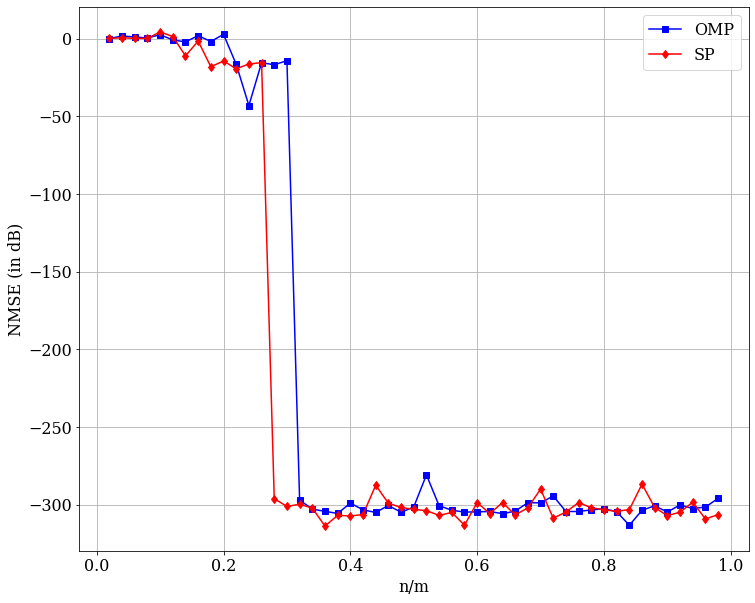

In [12]:
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.family"] = "serif"
plt.plot(n_arr, nmse_arr_OMP, 'bs-',label='OMP')
plt.plot(n_arr, nmse_arr_SP, 'rd-',label='SP')
plt.xlabel("n/m")
plt.ylabel("NMSE (in dB)")
plt.grid(True)
plt.legend()